## <문제> 1이 될 때까지 : 문제 설명

- 어떠한 수 N이 1이 될 때까지 다음의 두 과정 중 하나를 반복적으로 수행하고자 한다. 단, 두 번째 연산은 N이 K로 나누어 떨어질 때만 선택할 수 있다.
 - 1. N에서 1을 뺀다.
 - 2. N을 K로 나눈다.
- 예를 들어 N이 17, K가 4라고 가정. 이 때 1번의 과정을 한 번 수행하면 N은 16이 된다. 이후에 2번의 과정을 두 번 수행하면 N은 1이 된다. 결과적으로 이 경우 전체 과정을 실행한 횟수는 3이 된다. 이는 N을 1로 만드는 최소 횟수
- N과 K가 주어질 때, N이 1이 될 때까지 1번 혹은 2번의 과정을 수행해야 하는 최소 횟수를 구하는 프로그램을 작성

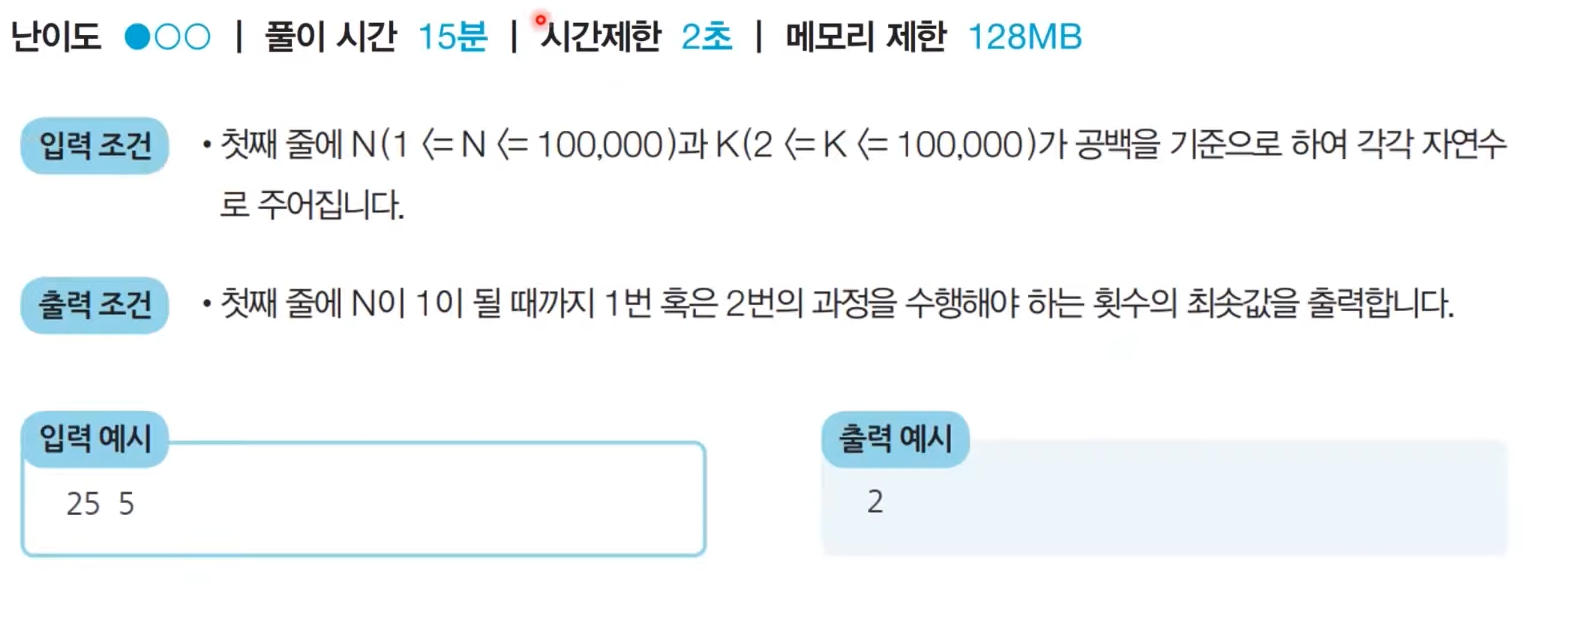

In [23]:
N = int(input())
K = int(input())

count = 0
while N != 1 :
    if N%K == 0 :
        N /= K
        count += 1 
    else : 
        N -= 1 
        count += 1 
print(count)

149
6
10


### 문제 해결 아이디어 
- 주어진 N에 대하여 최대한 많이 나누기를 수행하면 된다.
 - N의 값을 줄일 때 2 이상의 수로 나누는 작업이 1을 빼는 작업보다 수를 훨씬 많이 줄일 수 있다.

- N = 25, K = 3인 경우

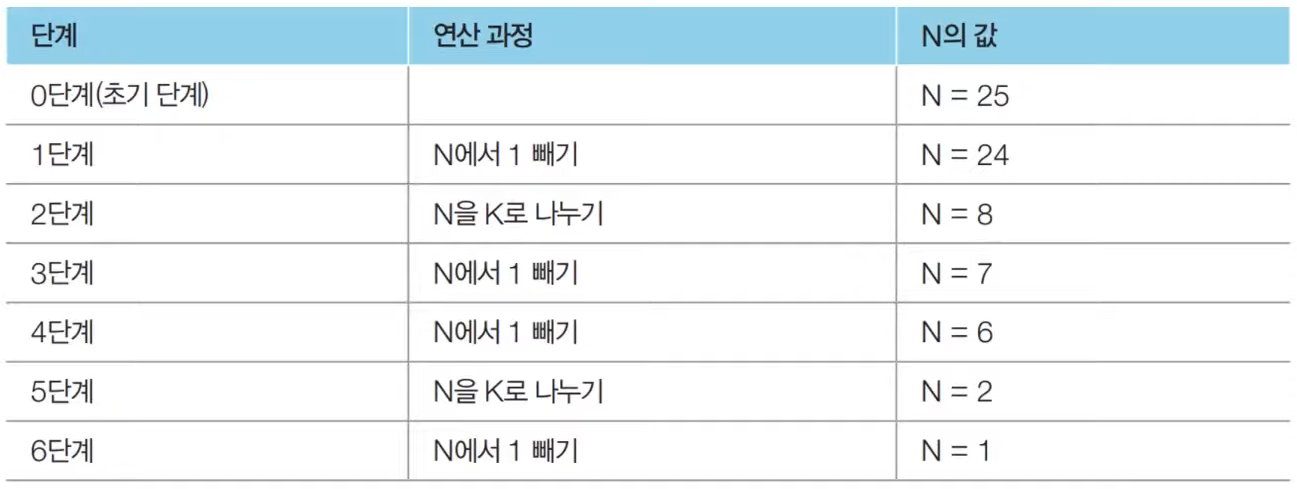

### 정당성 분석 
- **가능하면 최대한 많이 나누는 작업**이 항상 최적의 해를 보장할 수 있는가?
- N이 아무리 큰 수여도 K로 계속 나눈다면 기하급수적으로 빠르게 줄일 수 있다.
- K가 2 이상이기만 하면, K로 나누는 것이 1을 빼는 것보다 항상 빠르게 N을 줄일 수 있다.
 - 또한 N은 항상 1에 도달하게 된다.(최적의 해 성립)

### 답안 예시

In [43]:
# N, K를 공백을 기준으로 구분하여 입력 받기
n, k = map(int, input().split())
result = 0

while True : 
    # N이 K로 나누어 떨어지는 수가 될 때까지 빼기
    target = (n//k) * k # N이 K로 나누어 떨어지지 않는다면 나누어 떨어질 수 있는 가장 가까운 숫자를 출력
    result += (n - target) # 1을 빼는 연산을 수행하는 횟수
    n = target 
    # N이 K보다 작을 때(더 이상 나눌 수 없을 때) 반복문 탈출
    if n < k :
        break
    # K로 나누기
    result += 1 
    n //= k
# 마지막으로 남은 수에 대하여 1씩 빼기
result += (n-1)
print(result)

1894 23
25


In [42]:
### 복습
n, k = map(int, input().split()) # 입력 받기 
result = 0 

while True : 
    target = (n//k) * k 
    result += (n - target)
    n = target 
    
    if n < k :
        break
    result += 1 
    n //= k
result += (n-1)
print(result)

1894 23
25


## <문제> 곱하기 혹은 더하기 : 문제 설명

각 자리가 0부터 9까지의 정수로 이루어진 문자열 S가 있을 때, 왼쪽부터 오른쪽까지 하나씩 모든 숫자를 확인해가며 숫자 사이에 '×' 혹은 '+' 연산자를 넣어 결과적으로 만들어질 수 있는 가장 큰 수를 구하는 프로그램 작성
- ex) 02984 : ((((0+2)×9)×8)×4) = 576 

또한 만들어질 수 있는 가장 큰 수는 항상 20억 이하의 정수가 되도록 입력이 주어진다.

## <문제> 곱하기 혹은 더하기 : 문제 해결 아이디어
대부분의 경우 '+'보다는 '×'가 더 값을 크게 만든다.
- ex. 5+6 = 11, 5×6 = 30

하지만 두 수 중에서 하나라도 '0' 혹은 '1'인 경우, 곱하기보다는 더하기를 수행하는 것이 효율적이다.

따라서 두 수에 대하여 연산을 수행할 때, 두 수 중에서 하나라도 1 이하인 경우에는 더하며, 두 수가 모두 2 이상인 경우에는 곱하면 정답

## <문제> 곱하기 혹은 더하기 : 답안 예시

In [2]:
data = input()

# 첫 번째 문자를 숫자로 변경하여 대입
result = int(data[0])
print(result)
for i in range(1, len(data)) : 
    # 두 수 중에서 하나라도 '0' 혹은 '1'인 경우 곱하기보다는 더하기 수행
    num = int(data[i])
    if num <= 1 or result <=1 :
        result += num 
    else :
        result *= num

print(result)

02984
0
576


## <문제> 모험가 길드 : 문제 설명
한 마을에 모험가가 N명 있다. 모험가 길드에서는 N명의 모험가를 대상으로 '공포도'를 측정했는데 '공포도'가 높은 모험가는 쉽게 공포를 느껴 위험 상황에서 제대로 대처할 능력이 떨어진다.

모험가 길드장은 모험가 그룹을 안젛나게 구성하고자 공포도가 X인 모험가는 반드시 X명 이상으로 구성한 모험가 그룹에 참여해야 여행을 떠날 수 있도록 규정 

**N명의 모험가에 대한 정보가 주어졌을 때, 여행을 떠날 수 있는 그룹 수의 최댓값을 구하는 프로그램** 작성

ex. N = 5이고 각 모험의 공포도가 다음과 같다고 가정
- 2, 3, 1, 2, 2

이 경우 그룹 1에 공포도가 1,2,3인 모험가를 한 명씩 넣고, 그룹 2에 공포도가 2인 남은 두 명을 넣게 되면 총 2개의 그룹을 만들 수 있다.

또한 몇 명의 모험가는 마을에 그대로 남아 있어도 되기 때문에, 모든 모험가를 특정한 그룹에 넣을 필요는 없다.

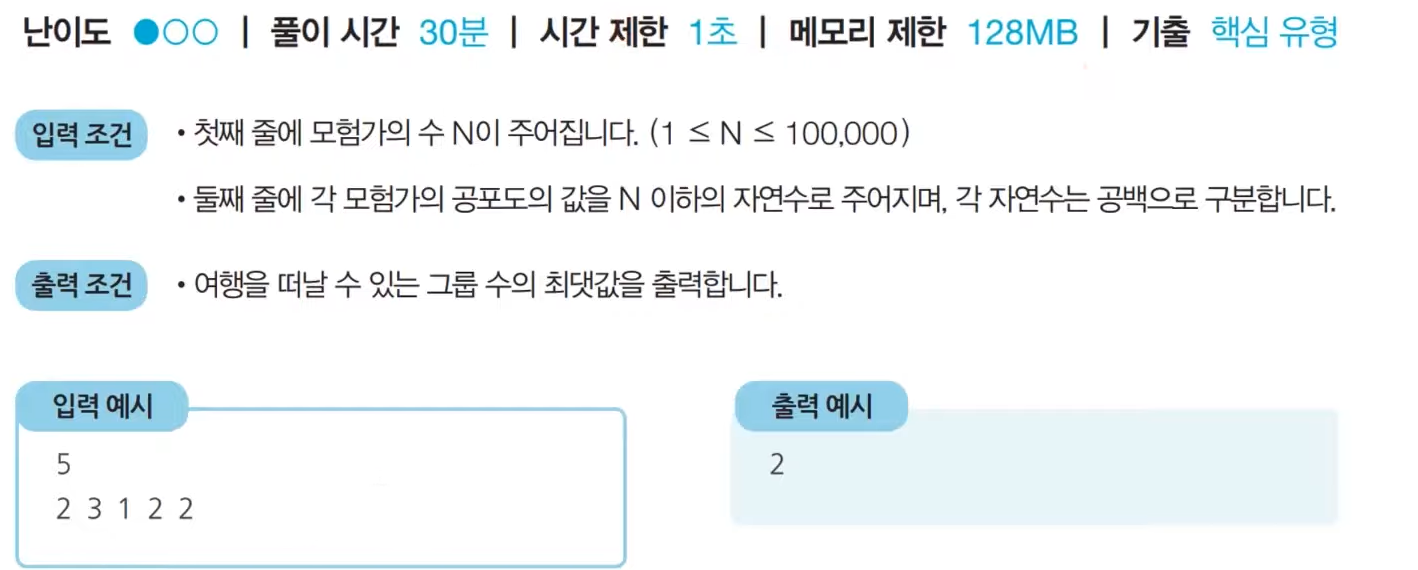

## <문제> 모험가 길드 : 문제 해결 아이디어
오름차순 정렬 이후에 공포도가 가장 낮은 모험가부터 하나씩 확인한다.

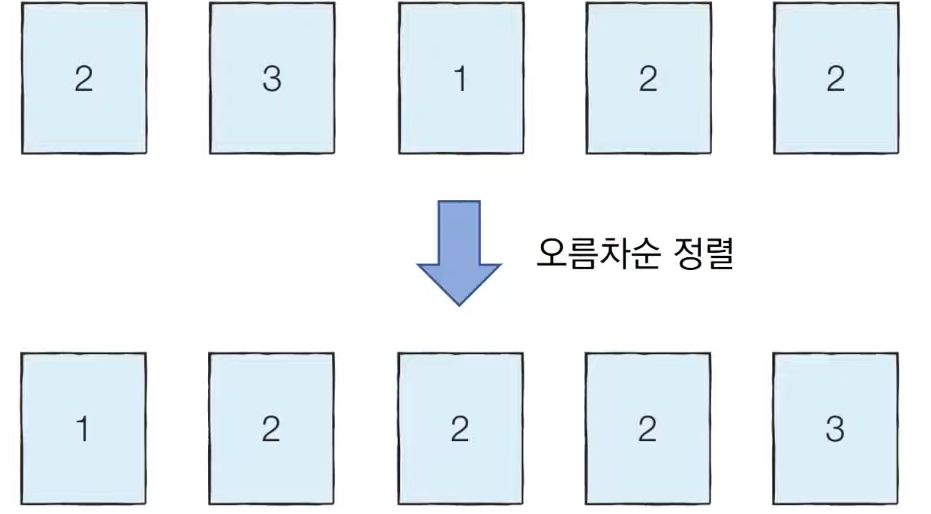

앞에서부터 공포도를 하나씩 확인하며 '현재 그룹에 포함된 모험가의 수'가 '현재 확인하고 있는 공포도'보다 크거나 같다면 이를 그룹으로 설정하면 된다.

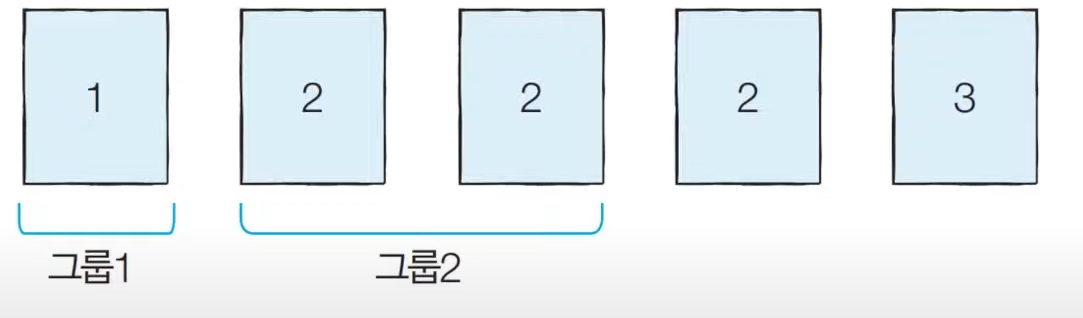

이를 이용하면 공포도가 오름차순으로 정렬되어 있다는 점에서 항상 최소한의 모험가의 수만 포함하여 그룹을 결성하게 된다.

In [7]:
n = input()
data = list(map(int, input().split()))
data.sort()

result = 0 # 총 그룹의 수 
count = 0 # 현재 그룹에 포함된 모험가의 수 

for i in data : # 공포도를 낮은 것부터 하나씩 확인하며
    count += 1 # 현재 그룹에 해당 모험가를 포함시키기
    if count >= i : # 현재 그룹에 포함된 모험가의 수가 현재의 공포도 이상이라면, 그룹 결성
        result += 1 # 그룹 결성시키기
        count = 0 # 현재 그룹은 결성이 완료되었으므로 다음 그룹을 살펴보기 위해 모험가의 수 초기화
        
print(result)
    
    

10 
1 3 5 4 5 2 1 2 4 5 3
4
